In [8]:
#imported libs
import matplotlib.pyplot as plt
from solve import *
import os
from tqdm import tqdm
import time
import numpy as np
import random

### Crafted Graphs
Created for the purpose of testing

In [14]:
def graph_dens_gen(n,proba=0.5):
    graph = np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            isedge = random.random()>proba
            graph[i,j] = isedge
            graph[j,i] = isedge
    return graph

In [15]:
nb_sample = 100

#Here we store 
half_dense = []
point2_dense = []
point8_dense = []

solution_half = []
solution_2 = []
solution_8 = []

for nb_vertex in tqdm(range(5,15)):
    dummy1,tmp1 = [], []
    dummy2,tmp2 = [], []
    dummy3,tmp3 = [], []
    for _ in range(nb_sample):
        graph1,graph2,graph3 = graph_dens_gen(nb_vertex), graph_dens_gen(nb_vertex,0.2), graph_dens_gen(nb_vertex,0.8)

        enum = Enumerative(graph1,list(range(nb_vertex)))
        dummy1.append(graph1) ; tmp1.append(enum.solve(nb_vertex+1))
    
        enum = Enumerative(graph2,list(range(nb_vertex)))
        dummy2.append(graph2) ; tmp2.append(enum.solve(nb_vertex+1))
        
        enum = Enumerative(graph3,list(range(nb_vertex)))
        dummy3.append(graph3) ; tmp3.append(enum.solve(nb_vertex+1))
        
    half_dense.append(dummy1)
    solution_half.append(tmp1)
    
    point2_dense.append(dummy2)
    solution_2.append(tmp2)
    
    point8_dense.append(dummy3)
    solution_8.append(tmp3)
    

100%|██████████| 10/10 [03:55<00:00, 23.54s/it]


In [70]:
def write_graphs_opt(name,matrix):
    
    n = len(matrix)
    nb_edges = np.sum(matrix)//2
    with open(name,'w') as f:
        f.write(str(n)+' '+str(int(nb_edges))+'\n')
        for i in range(n):
            for j in range(i+1,n):
                f.write(str(i+1)+' '+str(j+1)+' '+str(int(matrix[i,j]))+'\n')
                
#write_graphs_opt('test',half_dense[0][0])

In [71]:
nbv = list(range(5,15))
filename = 'opti_personal_graph.txt'
folder = 'personal_graph_examples/'

for i in range(len(half_dense)):
    for j in range(len(half_dense[i])):
        with open(filename,'a') as f:
            name1 = '05 '+str(nbv[i])+'.'+str(j)+' '+str(int(solution_half[i][j]))
            name2 = '02 '+str(nbv[i])+'.'+str(j)+' '+str(int(solution_2[i][j]))
            name3 = '08 '+str(nbv[i])+'.'+str(j)+' '+str(int(solution_8[i][j]))
            f.write(name1+'\n')
            f.write(name2+'\n')
            f.write(name3+'\n')
            
        write_graphs_opt(folder+''.join(name1.split()), half_dense[i][j])
        write_graphs_opt(folder+''.join(name2.split()), point2_dense[i][j])
        write_graphs_opt(folder+''.join(name3.split()), point8_dense[i][j])

In [23]:
result = []
for x in tqdm(range(len(half_dense))):
    result2 = []
    for y in range(100):
        X = half_dense[x][y]
        n = 5+x
        #Williamson testing cvxpy 
        sdp = Sdp_relax_algo(X,n)
        start = time.time()
        perf1 = sdp.solve(method='standard')
        tm1 = time.time()-start

        sdp = Sdp_relax_algo(X,n)
        start = time.time()
        perf2 = sdp.solve(method='grad')
        tm2 = time.time()-start

        greedy = Greedy(X,[i for i in range(n)])
        start = time.time()
        perf3 = greedy.solve()
        tm3 = time.time()-start

        #Half_approx testing
        point_five = Half_rand_algo(X,[i for i in range(n)])
        start = time.time()
        perf4 = point_five.solve()
        tm4 = time.time()-start

        result2.append([[perf1,tm1],[perf2,tm2],[perf3,tm3],[perf4,tm4]])
    result2 = np.array(result2)
    result.append(result2)

100%|██████████| 10/10 [04:41<00:00, 28.16s/it]


In [26]:
result = np.array(result)

In [28]:
result.shape

(10, 100, 4, 2)

In [58]:
for n in range(10):
    t,x,y,z = result[n,:,0,0]/solution_half[n], result[n,:,1,0]/solution_half[n], result[n,:,2,0]/solution_half[n], result[n,:,3,0]/solution_half[n]
    t[95],x[95],y[95],z[95] = 0.5,0.5,0.5,0.5
    print(np.mean(t),np.mean(x),np.mean(y),np.mean(z))

0.991 0.4815 0.8759999999999999 0.5601666666666667
0.9920833333333333 0.5027261904761905 0.7779404761904761 0.5914285714285714
0.9891269841269842 0.5601854256854257 0.6734585137085137 0.6463564213564215
0.9845236985236987 0.5297590187590188 0.6350981518481518 0.6044549894549895
0.9771181571696278 0.5905426534250063 0.5320411565558625 0.6527320816438462
0.9756997910500234 0.6056184097550197 0.5027392603956071 0.6830253063929534
0.9748688135367871 0.5974060683076364 0.45605862807643 0.7002277360843788
0.9739315071139265 0.6215366892724542 0.45817560335322116 0.6632993140030229
0.9669201544901768 0.6156184453601028 0.4004502992455161 0.7142641151190093
0.9702197086033425 0.6310580027736953 0.4059321200304911 0.7197435428599033


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [59]:
for n in range(10):
    t,x,y,z = result[n,:,0,1], result[n,:,1,1], result[n,:,2,1], result[n,:,3,1]
    print(np.mean(t),np.mean(x),np.mean(y),np.mean(z))

0.039190630912780765 0.1375398802757263 5.702495574951172e-05 3.466367721557617e-05
0.03946623086929321 0.14360233068466186 5.781173706054687e-05 3.260135650634766e-05
0.04343379020690918 0.15951188325881957 5.907773971557617e-05 3.207206726074219e-05
0.04675433158874512 0.17236919164657594 6.731271743774414e-05 3.151178359985351e-05
0.05332325696945191 0.19452610969543457 6.247997283935547e-05 3.420352935791016e-05
0.055735347270965574 0.2083490562438965 6.289243698120118e-05 3.372430801391601e-05
0.06086193561553955 0.22359561204910278 6.074666976928711e-05 3.564596176147461e-05
0.07495189666748046 0.2611988139152527 7.336139678955078e-05 3.857135772705078e-05
0.09668913841247559 0.31843688488006594 8.001089096069335e-05 4.169702529907226e-05
0.09664844512939454 0.3299855303764343 8.789777755737305e-05 3.855705261230469e-05


### Generic Graphs
From Standard test set

In [91]:
graphs = os.listdir('graph_examples/')
PATH = 'graph_examples/'

In [92]:
graph_infos = []
with open('opti_graph.txt','r') as f:
    for line in f.readlines():
        graph_infos.append(line.strip().split())

In [93]:
#Utilitaries function
def get_graph_ofVertex(n,graphs):
    result = []
    for graph in graphs:
        if int(float(graph[1].split()[0])) == n:
            result.append((graph_to_filename(graph),int(graph[2])))
    return np.array(result)

def get_graph_ofDensity(d,graphs):
    result = []
    d = ''.join(str(d).split('.'))
    for graph in graphs:
        if d in graph[0]:
            result.append([graph_to_filename(graph),int(graph[2])])
    return np.array(result)

def get_graphof_Den_Vert(n,d,graphs):
    result = []
    d = ''.join(str(d).split('.'))
    for graph in graphs:
        if d in graph[0] and int(float(graph[1].split()[0])) == n:
            result.append([graph_to_filename(graph),int(graph[2])])
    return np.array(result)


def graph_to_filename(graph):
    return '_'.join(graph[:2])

In [94]:
def scores(X,n,m=0,filename=None,verbose=1):

    #Williamson testing cvxpy 
    sdp = Sdp_relax_algo(X,n)
    start = time.time()
    max_enumerate = sdp.solve(method='standard')
    if verbose: print('Maximum found by Goemans Williamson method {}'.format(max_sdp))
    tme = time.time()-start
    if verbose: print('Time taken by Goemans Williamson method {}'.format(tms))

    #Greedy testing
    greedy = Greedy(X,[i for i in range(n)])
    start = time.time()
    max_greedy = greedy.solve()
    if verbose: print('Maximum found by greedy method {}'.format(max_greedy))
    tmg = time.time()-start
    if verbose: print('Time taken by greedy method {}'.format(tmg))

    #Half_approx testing
    point_five = Half_rand_algo(X,[i for i in range(n)])
    start = time.time()
    max_point_five = point_five.solve()
    if verbose: print('Maximum found by half approximative method {}'.format(max_point_five))
    tmh = time.time()-start
    if verbose: print('Time taken by half approximative method {}'.format(tmh))


    #Williamson random testing
    sdp = Sdp_relax_algo(X,n)
    start = time.time()
    max_sdp = sdp.solve(method='grad')
    if verbose: print('Maximum found by Goemans Williamson method {}'.format(max_sdp))
    tms = time.time()-start
    if verbose: print('Time taken by Goemans Williamson method {}'.format(tms))

    
    return [(max_enumerate,tme),(max_greedy,tmg),(max_point_five,tmh),(max_sdp,tms)]

In [64]:
get_val, get_time = lambda x:x[0], lambda x:x[1]

In [65]:
#getting graphs of vertex number 60

def graph_vertex(N,d):
    enumerate_total_perf, enumerate_total_time = [], []
    greedy_total_perf, greedy_total_time = [], []
    half_total_perf, half_total_time = [], []
    dw_total_perf, dw_total_time = [], []
    
    RESULT = []
    specimen = get_graphof_Den_Vert(N,d,graph_infos)
    for graph in specimen[:3]:
        graph_name, graph_opti = graph
        X,n,m = graph_read(PATH+graph_name)
        results = scores(X,n,m,verbose=0)
        RESULT.append(results+[int(graph_opti)])
    RESULT = np.array(RESULT)

    #print(RESULT)
    if len(specimen) == 0: return []
    enumerate_perf, enumerate_time = np.array([get_val(L) for L in RESULT[:,0]]), np.array([get_time(L) for L in RESULT[:,0]])
    greedy_perf, greedy_time =  np.array([get_val(L) for L in RESULT[:,1]]), np.array([get_time(L) for L in RESULT[:,1]])
    half_perf, half_time = np.array([get_val(L) for L in RESULT[:,2]]), np.array([get_time(L) for L in RESULT[:,2]])
    dw_perf, dw_time = np.array([get_val(L) for L in RESULT[:,3]]), np.array([get_time(L) for L in RESULT[:,3]])
    optimal = RESULT[:,4]

    enumerate_perf = enumerate_perf/optimal
    greedy_perf = greedy_perf/optimal
    half_perf =half_perf/optimal
    dw_perf = dw_perf/optimal

    enumerate_total_perf.append(np.sum(enumerate_perf)/len(enumerate_perf))
    enumerate_total_time.append(np.sum(enumerate_time)/len(enumerate_perf))

    greedy_total_perf.append(np.sum(greedy_perf)/len(greedy_perf))
    greedy_total_time.append(np.sum(greedy_time)/len(greedy_perf))

    half_total_perf.append(np.sum(half_perf)/len(half_perf))
    half_total_time.append(np.sum(half_time)/len(half_perf))

    dw_total_perf.append(np.sum(dw_perf)/len(dw_perf))
    dw_total_time.append(np.sum(dw_time)/len(dw_perf))

    return [(enumerate_total_perf,enumerate_time), (greedy_total_perf, greedy_total_time),
            (half_total_perf,half_total_time), (dw_total_perf,dw_total_time)]

In [66]:
#(enumerate_total_perf,enumerate_time), (greedy_total_perf, greedy_total_time), (half_total_perf,half_total_time), (dw_total_perf,dw_total_time) = graph_vertex(60,0.5)

In [67]:
# plt.figure(figsize=(10,6))
# x=np.arange(0,2)
# plt.bar(x,height=dw_total_perf,label='GW Perf')
# plt.bar(x,height=greedy_total_perf,label='Greedy Perf')
# plt.bar(x,height=half_total_perf,label='Half Perf')
# plt.bar(x,height=enumerate_total_perf,label='Enumerative Perf')

# plt.xticks(x,['60','80'])
# plt.title('Average Performance on different size of graphs')
# plt.legend()
# plt.show()

In [68]:
for n in [60,80,100]:
    for d in [0.1,0.5,0.9]:
        print(graph_vertex(n,d))

[]
[([0.9799341676568195], array([21.5951736 , 26.71644473, 24.23888135])), ([0.1127121704184282], [0.0004679361979166667]), ([0.4250635193349737], [7.621447245279948e-05]), ([0.8397849361999361], [2.230425993601481])]
[]
[]
[([0.9874954764742084], array([119.63660741, 110.80613303, 132.52669597])), ([0.08596838603108863], [0.0005072752634684244]), ([0.46141007541813067], [0.00010236104329427083]), ([0.8206445084675114], [4.557004928588867])]
[]
[([0.9397334595607205], array([619.25613642, 604.20367837, 588.51364994])), ([0.3420822206304334], [0.0006519158681233724]), ([0.35841730454649184], [8.543332417805989e-05]), ([0.6784486638395881], [7.667156934738159])]
[([0.9797193898590546], array([471.18887091, 543.19028735, 358.98683167])), ([0.055304041249351454], [0.0007120768229166666]), ([0.4487976169996164], [9.973843892415364e-05]), ([0.8793731173266605], [6.069552818934123])]
[([0.9880728776090683], array([349.58865643, 538.31525278, 558.14524794])), ([0.1530468840720727], [0.0028814

### Deterministic

In [82]:
def scores2(X,n,m=0,filename=None,verbose=1):

    #Williamson testing cvxpy 
    sdp = Sdp_relax_algo(X,n)
    start = time.time()
    max_enumerate = sdp.solve(method='grad')
    if verbose: print('Maximum found by Goemans Williamson method {}'.format(max_sdp))
    tme = time.time()-start
    if verbose: print('Time taken by Goemans Williamson method {}'.format(tms))


    #Williamson non random testing 
    sdp = Sdp_relax_algo(X,n)
    start = time.time()
    max_sdp = sdp.solve(method='grad',random=0)
    if verbose: print('Maximum found by Goemans Williamson method {}'.format(max_sdp))
    tms = time.time()-start
    if verbose: print('Time taken by Goemans Williamson method {}'.format(tms))

    
    return [(max_enumerate,tme),(max_sdp,tms)]

In [85]:
#getting graphs of vertex number 60

def graph_vertex2(N,d):
    enumerate_total_perf, enumerate_total_time = [], []
    dw_total_perf, dw_total_time = [], []
    
    RESULT = []
    specimen = get_graphof_Den_Vert(N,d,graph_infos)
    for graph in tqdm(specimen):
        graph_name, graph_opti = graph
        X,n,m = graph_read(PATH+graph_name)
        results = scores2(X,n,m,verbose=0)
        RESULT.append(results+[int(graph_opti)])
    RESULT = np.array(RESULT)

    #print(RESULT)
    if len(specimen) == 0: return []
    enumerate_perf, enumerate_time = np.array([get_val(L) for L in RESULT[:,0]]), np.array([get_time(L) for L in RESULT[:,0]])
    dw_perf, dw_time = np.array([get_val(L) for L in RESULT[:,1]]), np.array([get_time(L) for L in RESULT[:,1]])
    optimal = RESULT[:,2]

    enumerate_perf = enumerate_perf/optimal
    dw_perf = dw_perf/optimal

    enumerate_total_perf.append(np.sum(enumerate_perf)/len(enumerate_perf))
    enumerate_total_time.append(np.sum(enumerate_time)/len(enumerate_perf))


    dw_total_perf.append(np.sum(dw_perf)/len(dw_perf))
    dw_total_time.append(np.sum(dw_time)/len(dw_perf))

    return [(enumerate_total_perf,enumerate_time), (dw_total_perf,dw_total_time)]

In [87]:
ok = []
for n in [60,80]:
    for d in [0.1,0.5,0.9]:
        tmp = graph_vertex2(n,d)
        ok.append(tmp)

0it [00:00, ?it/s]
100%|██████████| 10/10 [04:44<00:00, 28.49s/it]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 10/10 [22:19<00:00, 134.00s/it]
0it [00:00, ?it/s]


### Deterministic and Probabilistic Comparison

In [162]:
specimen = get_graphof_Den_Vert(60,0.5,graph_infos)

In [163]:
X,n,m = graph_read('graph_examples/'+specimen[0][0])

In [164]:
sdp = Sdp_relax_algo(X,n)
vertices = [i for i in range(n)]
V = sdp.sdp_solve(method='grad') 
N = len(V)

In [170]:
# Different Random Generators for symmetrical vector
#Gen1
alls = []
res = []
tm = []
start = time.time()
for a in tqdm(range(50000)):
    r = np.random.normal(0,1,N)
    r /= np.linalg.norm(r, axis=0)

    M = np.matmul(r,V)>0
    S = [i for i in range(len(M)) if M[i]]
    T = [vertex for vertex in vertices if vertex not in S]
    A = X+X.T
    alls.append(np.sum(A[S,:][:,T]))
    if a%1000:
        res.append(np.max(alls))
        tmp = time.time()-start
        tm.append(tmp)
        if tmp > 26: break










  0%|          | 0/50000 [00:00<?, ?it/s]








  0%|          | 185/50000 [00:00<00:27, 1843.09it/s]








  1%|          | 321/50000 [00:00<00:30, 1649.85it/s]








  1%|          | 460/50000 [00:00<00:31, 1558.95it/s]








  1%|          | 604/50000 [00:00<00:32, 1521.22it/s]








  2%|▏         | 829/50000 [00:00<00:29, 1683.25it/s]








  2%|▏         | 974/50000 [00:00<00:30, 1589.80it/s]








  2%|▏         | 1120/50000 [00:00<00:31, 1547.80it/s]








  3%|▎         | 1311/50000 [00:00<00:29, 1640.60it/s]








  3%|▎         | 1470/50000 [00:00<00:32, 1514.40it/s]








  3%|▎         | 1620/50000 [00:01<00:32, 1470.25it/s]








  4%|▎         | 1766/50000 [00:01<00:36, 1338.07it/s]








  4%|▍         | 1902/50000 [00:01<00:39, 1212.24it/s]








  4%|▍         | 2027/50000 [00:01<00:49, 973.76it/s] 








  4%|▍         | 2135/50000 [00:01<00:55, 869.98it/s]








  4%|▍         | 2231/50000 [00:01<00:53, 892.56it/s]








  5%

 17%|█▋        | 8329/50000 [00:21<02:11, 316.19it/s]








 17%|█▋        | 8362/50000 [00:22<02:14, 309.11it/s]








 17%|█▋        | 8397/50000 [00:22<02:10, 319.14it/s]








 17%|█▋        | 8430/50000 [00:22<02:28, 279.75it/s]








 17%|█▋        | 8461/50000 [00:22<02:24, 288.10it/s]








 17%|█▋        | 8491/50000 [00:22<02:24, 286.60it/s]








 17%|█▋        | 8521/50000 [00:22<02:56, 235.67it/s]








 17%|█▋        | 8547/50000 [00:22<03:09, 218.23it/s]








 17%|█▋        | 8573/50000 [00:22<03:01, 228.10it/s]








 17%|█▋        | 8601/50000 [00:23<02:52, 240.08it/s]








 17%|█▋        | 8627/50000 [00:23<02:48, 244.93it/s]








 17%|█▋        | 8662/50000 [00:23<02:34, 267.97it/s]








 17%|█▋        | 8690/50000 [00:23<02:43, 252.72it/s]








 17%|█▋        | 8717/50000 [00:23<03:19, 206.94it/s]








 17%|█▋        | 8740/50000 [00:23<03:21, 204.41it/s]








 18%|█▊        | 8763/50000 [00:23<03:15, 211.21it/s]








 18%|█▊ 

In [166]:
start = time.time()
value = sdp.solve(method='grad',random=0)
print(time.time()-start)









 18%|█▊        | 9109/50000 [00:35<02:24, 282.29it/s]

24.20352268218994


In [167]:
print(value)

536.0


In [171]:
res[-1]

488.0

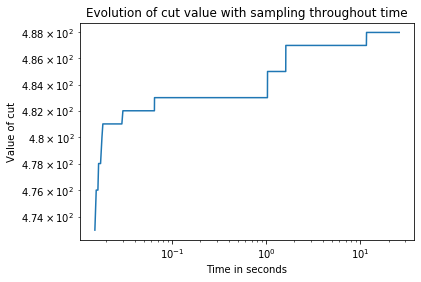

In [172]:
plt.loglog(tm,res)
plt.title('Evolution of cut value with sampling throughout time')
plt.xlabel('Time in seconds')
plt.ylabel('Value of cut')
plt.show()

In [152]:
specimen = get_graphof_Den_Vert(80,0.5,graph_infos)
X,n,m = graph_read('graph_examples/'+specimen[0][0])

In [153]:
sdp = Sdp_relax_algo(X,n)
vertices = [i for i in range(n)]
V = sdp.sdp_solve(method='grad') 
N = len(V)

In [154]:
start = time.time()
value = sdp.solve(method='grad',random=0)
print(time.time()-start)

94.35001254081726


In [155]:
print(value)

921.0


In [156]:
# Different Random Generators for symmetrical vector
#Gen1
alls = []
res = []
tm = []
start = time.time()
for a in tqdm(range(50000)):
    r = np.random.normal(0,1,N)
    r /= np.linalg.norm(r, axis=0)

    M = np.matmul(r,V)>0
    S = [i for i in range(len(M)) if M[i]]
    T = [vertex for vertex in vertices if vertex not in S]
    A = X+X.T
    alls.append(np.sum(A[S,:][:,T]))
    if a%1000:
        res.append(np.max(alls))
        tmp = time.time()-start
        tm.append(tmp)
        if tmp > 95: break








  0%|          | 0/50000 [00:00<?, ?it/s]






  0%|          | 233/50000 [00:00<00:21, 2323.41it/s]






  1%|          | 370/50000 [00:00<00:25, 1921.34it/s]






  1%|          | 469/50000 [00:00<00:33, 1498.42it/s]






  1%|          | 562/50000 [00:00<00:40, 1216.87it/s]






  1%|▏         | 653/50000 [00:00<00:44, 1098.04it/s]






  1%|▏         | 743/50000 [00:00<00:49, 998.56it/s] 






  2%|▏         | 831/50000 [00:00<00:53, 919.47it/s]






  2%|▏         | 920/50000 [00:00<00:53, 910.09it/s]






  2%|▏         | 1006/50000 [00:00<00:58, 834.80it/s]






  2%|▏         | 1112/50000 [00:01<00:54, 890.38it/s]






  2%|▏         | 1204/50000 [00:01<00:54, 898.68it/s]






  3%|▎         | 1306/50000 [00:01<00:52, 930.31it/s]






  3%|▎         | 1400/50000 [00:01<00:59, 819.32it/s]






  3%|▎         | 1485/50000 [00:01<00:59, 808.64it/s]






  3%|▎         | 1568/50000 [00:01<01:03, 760.61it/s]






  3%|▎         | 1646/50000 [00:01<01:05, 742.3

 16%|█▋        | 8227/50000 [00:25<11:21, 61.27it/s]






 16%|█▋        | 8243/50000 [00:25<09:18, 74.77it/s]






 17%|█▋        | 8270/50000 [00:25<07:21, 94.43it/s]






 17%|█▋        | 8285/50000 [00:26<07:44, 89.75it/s]






 17%|█▋        | 8298/50000 [00:26<07:46, 89.35it/s]






 17%|█▋        | 8310/50000 [00:26<08:00, 86.81it/s]






 17%|█▋        | 8329/50000 [00:26<06:46, 102.57it/s]






 17%|█▋        | 8342/50000 [00:26<06:58, 99.42it/s] 






 17%|█▋        | 8360/50000 [00:26<06:03, 114.64it/s]






 17%|█▋        | 8374/50000 [00:26<06:02, 114.71it/s]






 17%|█▋        | 8387/50000 [00:27<06:09, 112.49it/s]






 17%|█▋        | 8400/50000 [00:27<06:52, 100.81it/s]






 17%|█▋        | 8411/50000 [00:27<07:29, 92.44it/s] 






 17%|█▋        | 8430/50000 [00:27<06:20, 109.21it/s]






 17%|█▋        | 8474/50000 [00:27<04:54, 140.90it/s]






 17%|█▋        | 8506/50000 [00:27<04:05, 169.26it/s]






 17%|█▋        | 8531/50000 [00:27<04:10, 165.

 25%|██▌       | 12632/50000 [00:49<03:50, 162.37it/s]






 25%|██▌       | 12651/50000 [00:50<03:43, 167.41it/s]






 25%|██▌       | 12668/50000 [00:50<03:49, 162.85it/s]






 25%|██▌       | 12685/50000 [00:50<03:56, 157.57it/s]






 25%|██▌       | 12704/50000 [00:50<03:48, 163.15it/s]






 25%|██▌       | 12722/50000 [00:50<03:42, 167.26it/s]






 25%|██▌       | 12739/50000 [00:50<03:48, 163.19it/s]






 26%|██▌       | 12756/50000 [00:50<03:52, 160.01it/s]






 26%|██▌       | 12773/50000 [00:50<03:56, 157.56it/s]






 26%|██▌       | 12789/50000 [00:50<03:57, 156.55it/s]






 26%|██▌       | 12805/50000 [00:51<04:00, 154.76it/s]






 26%|██▌       | 12821/50000 [00:51<04:08, 149.49it/s]






 26%|██▌       | 12837/50000 [00:51<04:13, 146.73it/s]






 26%|██▌       | 12852/50000 [00:51<04:12, 146.87it/s]






 26%|██▌       | 12868/50000 [00:51<04:07, 150.24it/s]






 26%|██▌       | 12885/50000 [00:51<03:59, 154.89it/s]






 26%|██▌       | 12902/5

 31%|███       | 15368/50000 [01:14<03:47, 152.20it/s]






 31%|███       | 15388/50000 [01:14<03:32, 162.81it/s]






 31%|███       | 15408/50000 [01:14<03:22, 170.54it/s]






 31%|███       | 15429/50000 [01:14<03:12, 179.42it/s]






 31%|███       | 15448/50000 [01:15<03:09, 182.36it/s]






 31%|███       | 15467/50000 [01:15<03:07, 183.83it/s]






 31%|███       | 15486/50000 [01:15<03:07, 183.83it/s]






 31%|███       | 15505/50000 [01:15<03:10, 181.22it/s]






 31%|███       | 15525/50000 [01:15<03:06, 184.87it/s]






 31%|███       | 15544/50000 [01:15<03:36, 158.95it/s]






 31%|███       | 15565/50000 [01:15<03:21, 171.01it/s]






 31%|███       | 15583/50000 [01:15<03:26, 166.47it/s]






 31%|███       | 15601/50000 [01:15<03:24, 168.26it/s]






 31%|███       | 15621/50000 [01:16<03:19, 172.73it/s]






 31%|███▏      | 15639/50000 [01:16<03:36, 158.90it/s]






 31%|███▏      | 15659/50000 [01:16<03:23, 168.77it/s]






 31%|███▏      | 15680/5

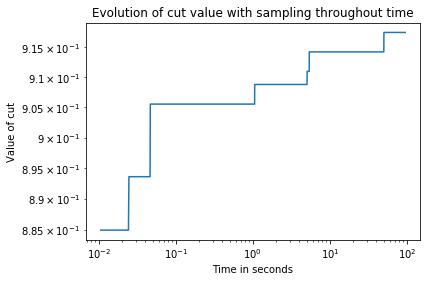

In [161]:
plt.loglog(tm,res)
plt.title('Evolution of cut value with sampling throughout time')
plt.xlabel('Time in seconds')
plt.ylabel('Value of cut')
plt.show()